# Tratamento dos dados

In [50]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ML_Houses_dataset.csv')

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      309
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 85, dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Pesos,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.011985,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.082336,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.353092,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.263381,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.790667,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.075969,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.521046,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.506378,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.473881,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
Pesos,-0.011985,-0.082336,0.353092,0.263381,0.790667,-0.075969,0.521046,0.506378,0.473881,1.000000,...,0.328885,0.316700,-0.126932,0.045875,0.115218,0.093810,-0.020752,0.048788,-0.029665,1.000000


In [7]:
X = df[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF']]

In [37]:
# from sklearn.preprocessing import RobustScaler

# r_scaler = RobustScaler()

# r_scaler.fit(X)

# X = r_scaler.transform(X)

# X

In [8]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,7,2003,2003,196.0,0,61
1,80.0,9600,6,1976,1976,0.0,298,0
2,68.0,11250,7,2001,2002,162.0,0,42
3,60.0,9550,7,1915,1970,0.0,0,35
4,84.0,14260,8,2000,2000,350.0,192,84
...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,40
1456,85.0,13175,6,1978,1988,119.0,349,0
1457,66.0,9042,7,1941,2006,0.0,0,60
1458,68.0,9717,5,1950,1996,0.0,366,0


In [9]:
y = df['SalePrice']

In [10]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [63]:
imputer = KNNImputer(n_neighbors=2, weights='distance')

In [64]:
imputer.fit(X)

KNNImputer(n_neighbors=2, weights='distance')

In [65]:
Xtrans = imputer.transform(X)

In [66]:
X = pd.DataFrame(Xtrans, columns=X.columns)

In [67]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,WoodDeckSF,OpenPorchSF
0,65.0,8450.0,7.0,2003.0,2003.0,196.0,0.0,61.0
1,80.0,9600.0,6.0,1976.0,1976.0,0.0,298.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,162.0,0.0,42.0
3,60.0,9550.0,7.0,1915.0,1970.0,0.0,0.0,35.0
4,84.0,14260.0,8.0,2000.0,2000.0,350.0,192.0,84.0
...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6.0,1999.0,2000.0,0.0,0.0,40.0
1456,85.0,13175.0,6.0,1978.0,1988.0,119.0,349.0,0.0
1457,66.0,9042.0,7.0,1941.0,2006.0,0.0,0.0,60.0
1458,68.0,9717.0,5.0,1950.0,1996.0,0.0,366.0,0.0


In [68]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

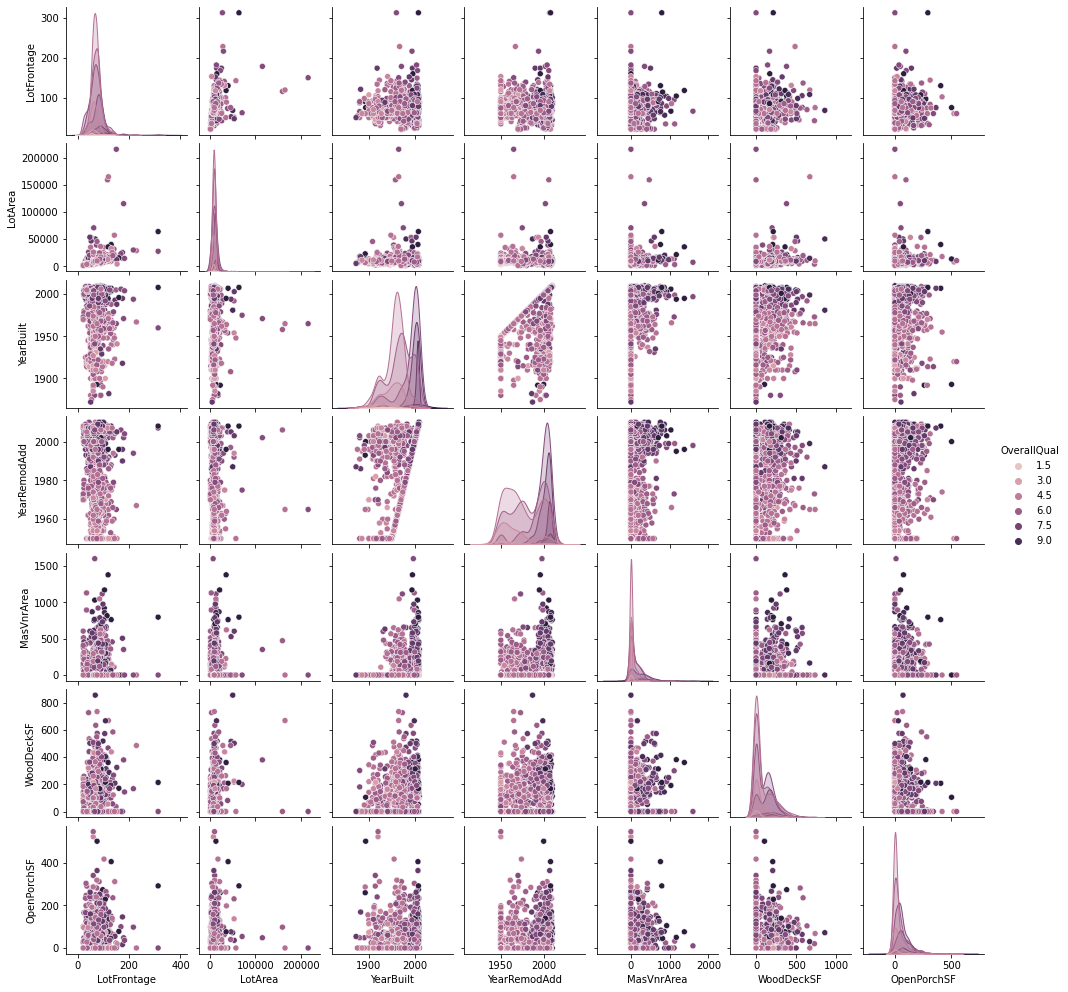

In [69]:
sns.pairplot(X, height=2, hue="OverallQual"); # OverallQual é a coluna com maior correlação com o target, preço.

# Prevendo o valor das casas com Linear Regression

In [70]:
linreg = LinearRegression().fit(X, y)

In [71]:
linreg.score(X, y)

0.7160186820352792

In [124]:
from sklearn.model_selection import cross_validate

cv = cross_validate(linreg, X, y, cv=5)

cv['test_score']

array([0.75121855, 0.71431528, 0.71542976, 0.71668087, 0.64382375])

In [128]:
X.shape

(1460, 8)

In [129]:
y.shape

(1460,)

# Prevendo o valor das casas com Deep Learning LSTM

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [206]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

In [235]:
model = Sequential()

model.add(LSTM(units=10, activation='linear', input_shape=(8,1)))
model.add(layers.Dense(7, activation="linear"))


model.compile(loss='mae', 
              optimizer='adam')

model.fit(X, y,
         batch_size=16,
         epochs=1000, verbose=1, callbacks=[es], validation_data=(X_val, y_val))

Epoch 1/1000
92/92 [==============================] - 2s 10ms/step - loss: 180398.8750 - val_loss: 175849.4375
Epoch 2/1000
92/92 [==============================] - 1s 8ms/step - loss: 179156.4219 - val_loss: 174472.1719
Epoch 3/1000
92/92 [==============================] - 1s 8ms/step - loss: 175895.5000 - val_loss: 171859.1094
Epoch 4/1000
92/92 [==============================] - 1s 10ms/step - loss: 106134.4766 - val_loss: 66411.6641
Epoch 5/1000
92/92 [==============================] - 1s 8ms/step - loss: 80836.3750 - val_loss: 60446.3008
Epoch 6/1000
92/92 [==============================] - 1s 8ms/step - loss: 66470.9609 - val_loss: 58873.9961
Epoch 7/1000
92/92 [==============================] - 1s 9ms/step - loss: 75577.7500 - val_loss: 54681.1133
Epoch 8/1000
92/92 [==============================] - 1s 8ms/step - loss: 64823.1133 - val_loss: 50960.8867
Epoch 9/1000
92/92 [==============================] - 1s 8ms/step - loss: 57340.4180 - val_loss: 50094.1133
Epoch 10/1000
92/92

In [258]:
pred = model.predict(X_val)

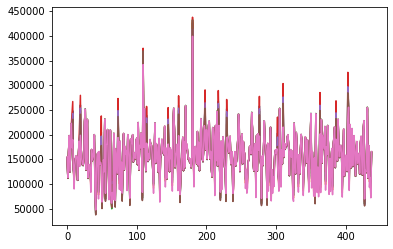

In [259]:
plt.plot(pred);

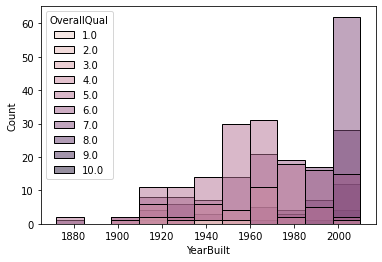

In [293]:
sns.histplot(x="YearBuilt", data=X_val, hue="OverallQual", legend=True);

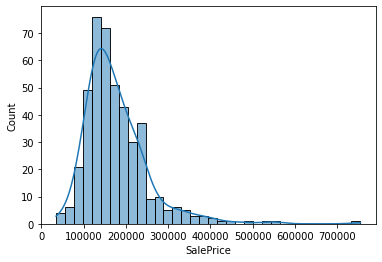

In [302]:
sns.histplot(y_val, kde=True);

In [307]:
df.to_csv('prevendo-valor-casas.csv')